<a href="https://colab.research.google.com/github/BiancadeFrancisco/Clusterizacao_DBSCAN/blob/main/DBSCAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Vantagens:**
- Não necessita especificar a quantidade de clusters
- Detecta clusters de formatos variados (densos)
- Robusto aos outliers

**Desvantagens:**
- A qualidade do cluster depende muito métrica de distância
- Não funciona bem em clusters com densidades diferentes (OPTICS)

In [ ]:
# Data wrangling
import numpy as np
import pandas as pd

# Dataviz
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer, InterclusterDistance, kelbow_visualizer, silhouette_visualizer

## -- Machine learning -- ##
from sklearn import datasets
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans, DBSCAN, MeanShift
from sklearn.cluster import k_means, dbscan, mean_shift, estimate_bandwidth
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster


# Didatic purposes
import string
from ipywidgets import interact

In [ ]:
# https://matplotlib.org/stable/tutorials/introductory/customizing.html
sns.set_theme(
    context='talk',
    style='ticks',
    font_scale=.8,
    palette='tab10',
    rc={
        'figure.figsize': (12,8),
        'axes.grid': True,
        'grid.alpha': .2,
        'axes.titlesize': 'x-large',
        'axes.titleweight': 'bold',
        'axes.titlepad': 20,
    }
)

scatter_kwargs = dict(palette='viridis', alpha=0.8, linewidth=0)

In [ ]:
# Simulate clusters

X,y = datasets.make_blobs(n_samples=int(5E3), n_features=2, centers=4, cluster_std=.8, random_state=0)
df = pd.DataFrame(X, columns=list(string.ascii_uppercase[:X.shape[1]]))
df.head()

,A,B
0,1.998996,1.535900
1,-2.788784,2.773154
2,-0.956255,3.630438
3,2.777738,-1.508286
4,0.982364,5.013279


In [ ]:
DBSCAN?

In [ ]:
# train DBSCAN:

model = DBSCAN()
labels = model.fit_predict(X)

In [ ]:
# train DBSCAN (function):

labels = dbscan(X)[1]

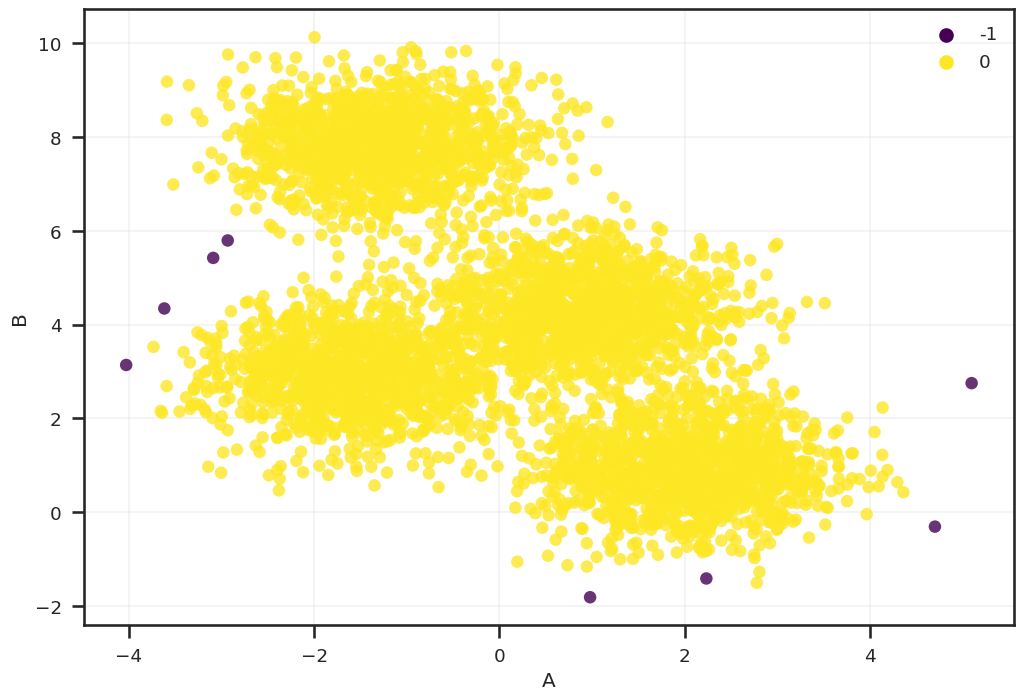

In [ ]:
# Visualize Output:

sns.scatterplot(data=df, x='A', y='B', hue=labels, **scatter_kwargs);

# 2 amostras

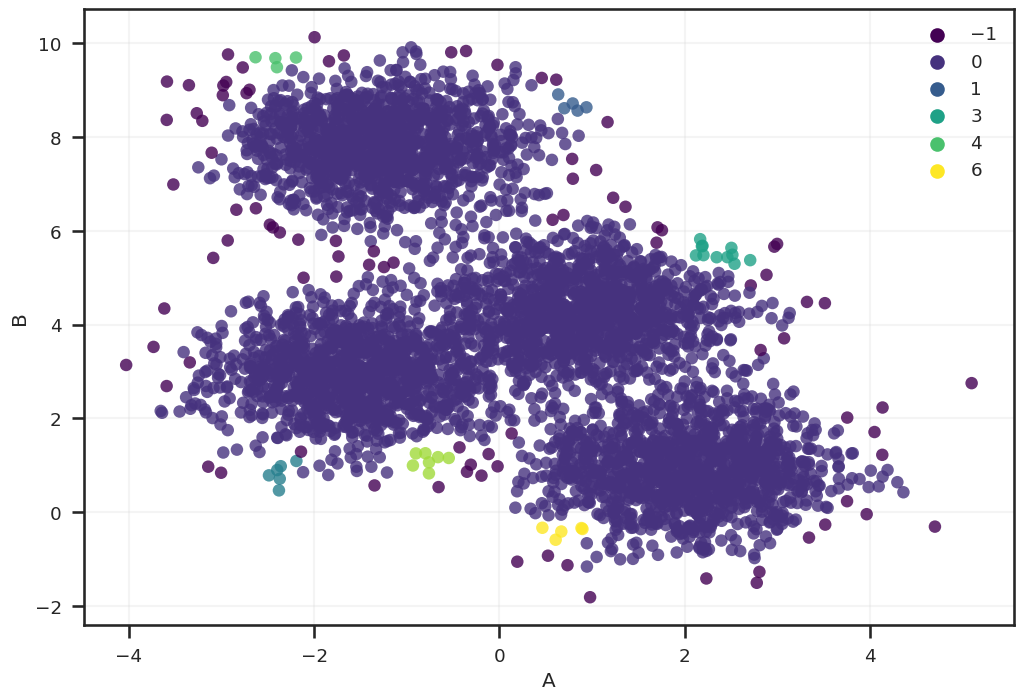

In [ ]:
def custom_dbscan(eps, min_samples):
  _, labels = dbscan(X, eps = eps, min_samples = min_samples)
  sns.scatterplot(data=df, x='A', y='B', hue=labels, **scatter_kwargs)
  plt.show()


custom_dbscan(0.25, 4)

In [ ]:
# FAZER MODO INTERATIVO:

@interact(eps=(0.01, 1, 0.01), min_samples=(1,20))
def custom_dbscan(eps, min_samples):
  _, labels = dbscan(X, eps = eps, min_samples = min_samples)
  sns.scatterplot(data=df, x='A', y='B', hue=labels, **scatter_kwargs)
  plt.show()

# eps (distancia máx de raios) e min_samples (qtd min de amostras)

interactive(children=(FloatSlider(value=0.5, description='eps', max=1.0, min=0.01, step=0.01), IntSlider(value…

In [ ]:
# FAZER MODO INTERATIVO, com ALTERAÇÃO PALETA PARA MELHOR VISUALIZAR:

@interact(eps=(0.01, 1, 0.01), min_samples=(1,20))
def custom_dbscan(eps, min_samples):
  _, labels = dbscan(X, eps = eps, min_samples = min_samples)
  sns.scatterplot(data=df, x='A', y='B', hue=labels, palette = "tab10")
  plt.show()

# eps (distancia máx de raios) e min_samples (qtd min de amostras)

interactive(children=(FloatSlider(value=0.5, description='eps', max=1.0, min=0.01, step=0.01), IntSlider(value…

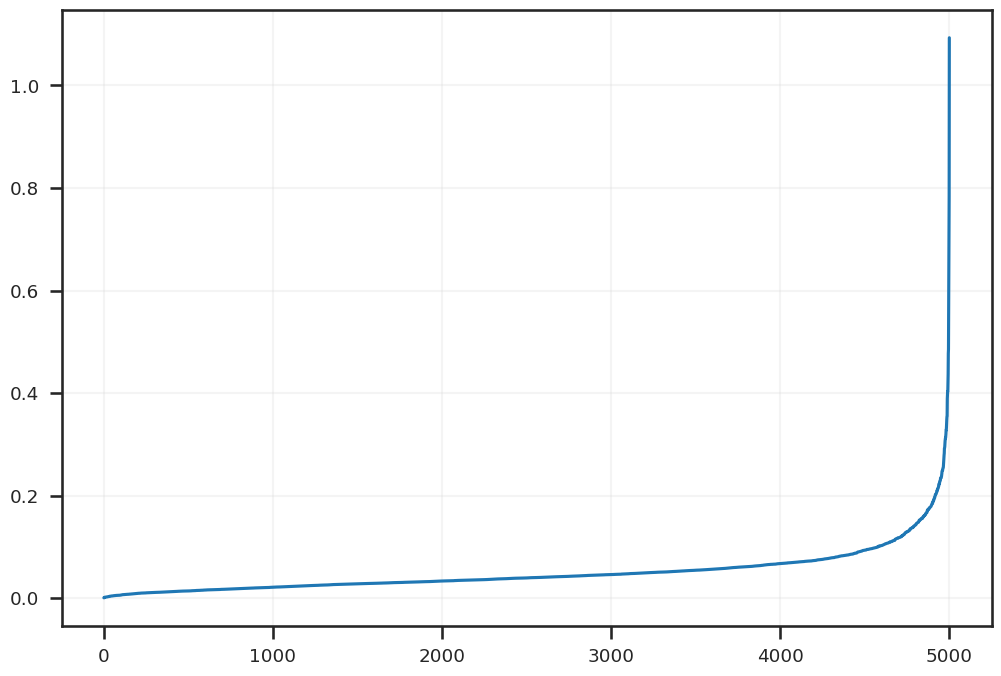

In [ ]:
# https://towardsdatascience.com/machine-learning-clustering-dbscan-determine-the-optimal-value-for-epsilon-eps-python-example-3100091cfbc
from sklearn.neighbors import NearestNeighbors
nn_model = NearestNeighbors(n_neighbors=2).fit(X)
distances, indices = nn_model.kneighbors(X)
distances = np.sort(distances, axis=0)
plt.plot(distances[:,1])
plt.show()